# Importing the data 

1.importing all the libraries and training + validation set 

2.parsing the 'Saledates' into year,month,day columns



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn 

In [3]:
df=pd.read_csv("data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [4]:
df_tmp=df.copy()

In [5]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [6]:
df_tmp.sort_values(by=["saledate"],inplace=True)

In [7]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [8]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [9]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [10]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [11]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


# Getting Data Ready 

1. Converting all objects data-type to category data type 
2. filling missing numeric values by median of the column
3. filling missing categorical values by incrementing their category codes by 1

In [12]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [13]:
df_tmp.to_csv("data/proc_data.csv",index=False)

In [14]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            df_tmp[label]=content.fillna(content.median())

In [15]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [16]:

df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [17]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [18]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        df_tmp[label]=pd.Categorical(content).codes+1

In [30]:
df_val=df_tmp[df_tmp.saleYear==2012]
df_train=df_tmp[df_tmp.saleYear!=2012]


In [20]:
 df_val.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
405675,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,0,2269,...,True,True,True,True,True,False,False,False,True,True
401133,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,2,85,...,True,True,True,True,True,True,True,True,True,True
406076,6258613,26800.0,1810917,13260,149,99.0,2000,24.0,2,1115,...,True,True,True,True,True,True,True,True,True,True
409018,6282680,42100.0,1543404,1830,149,99.0,2004,4373.0,3,64,...,False,False,False,False,False,True,True,True,True,True
409026,6282759,62100.0,1863077,11390,149,99.0,2006,3467.0,3,139,...,False,False,False,False,False,True,True,True,True,True


In [40]:
%%time 
from sklearn.ensemble import RandomForestRegressor
model =RandomForestRegressor(n_estimators=100,random_state=42, n_jobs=-1)
model.fit(df_train.drop("SalePrice",axis=1),df_train["SalePrice"])

CPU times: total: 18min 57s
Wall time: 2min 36s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [41]:
model.score(df_val.drop("SalePrice",axis=1),df_val["SalePrice"])

0.8727175969771312

# Building our own evaluation metrics


In [42]:
from sklearn.metrics import mean_squared_log_error ,r2_score


    

In [43]:
X_train=df_train.drop("SalePrice",axis=1)
Y_train=df_train["SalePrice"]
X_val=df_val.drop("SalePrice",axis=1)
Y_val=df_val["SalePrice"]

In [44]:
def rmsle(y_true,y_preds):
    return np.sqrt(mean_squared_log_error(y_true,y_preds))


def showscore(model):
    pred_train=model.predict(X_train)
    pred_val=model.predict(X_val)
    scores={
        "training rmsle":rmsle(Y_train,pred_train),
        "val rmsle":rmsle(Y_val,pred_val),
        "training R^2":r2_score(Y_train,pred_train),
        "Val R^2":r2_score(Y_val,pred_val)
    }
    return scores

In [45]:
showscore(model)

{'training rmsle': 0.08426351714047395,
 'val rmsle': 0.25557446689440955,
 'training R^2': 0.9875150955953674,
 'Val R^2': 0.8727175969771312}

# Randomised SearchCV


In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
Rs_grid = {    'n_estimators':np.arange(10,100,10),
               'max_features': [0.5,1,"sqrt","auto"],
               'max_depth': [None ,3,5,10],
               'min_samples_split': np.arange(2,20,2),
               'min_samples_leaf': np.arange(1,20,2),
               'max_samples':[10000]
          }

Rs_model=RandomizedSearchCV(model,param_distributions=Rs_grid,n_iter=5,verbose=True,cv=5)

In [51]:
Rs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [52]:
Rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 11,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [53]:
showscore(Rs_model)

{'training rmsle': 0.2970800387516331,
 'val rmsle': 0.3214419223767169,
 'training R^2': 0.805172195630724,
 'Val R^2': 0.7823314791240259}

# Using randomised SearchCV with bigger n_iter 

In [107]:
import pickle

In [109]:

Rs_grid = {    'n_estimators':np.arange(10,100,10),
               'max_features': [0.5,1,"sqrt","auto"],
               'max_depth': [None ,3,5,10],
               'min_samples_split': np.arange(2,20,2),
               'min_samples_leaf': np.arange(1,20,2),
               'max_samples':[10000]
          }

ideal_model=RandomizedSearchCV(model,param_distributions=Rs_grid,n_iter=100,verbose=True,cv=5)

ideal_model.fit(X_train,Y_train)




RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

# Testing data processing 

1. importing and converting test dataset into similar to train and validation set 
2. adding a column "auctioneerID_is_missing" in test dataframe with all values as false 

In [110]:
pickle.dump(ideal_model,open("ideal_model_bulldozer_preds.pkl", "wb"))

In [126]:
showscore(ideal_model)

{'training rmsle': 0.14469006962371858,
 'val rmsle': 0.24524163989538328,
 'training R^2': 0.9588145522577225,
 'Val R^2': 0.8818019502450093}

In [84]:
df_test=pd.read_csv("./data/Test.csv",low_memory=False,parse_dates=["saledate"])

In [91]:
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label]=content.astype("category").cat.as_ordered()

In [93]:
def process_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"]=pd.isnull(content)
                df[label]=content.fillna(content.median())

        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    
    return df

In [94]:
df_test=process_data(df_test)

In [96]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [119]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
141296,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
212552,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
62755,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [106]:
set(X_train.columns)-set(df_test.columns)

set()

In [105]:
df_test["auctioneerID_is_missing"]=False

In [121]:
final_df=pd.DataFrame()

In [122]:
test_preds = ideal_model.predict(df_test)


d:\programs\ML-bulldozer\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [123]:
test_preds


array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [124]:
final_df["SalesID"]= df_test["SalesID"]
final_df["SalePrice"]=test_preds

In [125]:
final_df.head()

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708


In [128]:
final_df.to_csv("./data/Final_df.csv",index=False)

# Most Important features for predictions 

In [129]:
feature_importance=pd.DataFrame()

In [135]:
feature_importance["col"]= X_train.columns

In [146]:
feature_importance["imp"]= ideal_model.feature_importances_

In [164]:
feature_importance.sort_values(by="imp",ascending=False,inplace=True)

<BarContainer object of 20 artists>

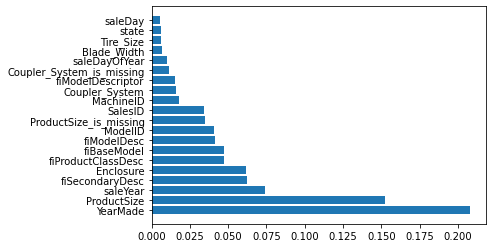

In [176]:
fig , ax=plt.subplots()

ax.barh(feature_importance["col"][:20],feature_importance["imp"][:20],height=0.8)
